In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_local, gaussian
from skimage.morphology import disk, binary_erosion, binary_opening, label, erosion, opening, medial_axis
from skimage.measure import regionprops
from skimage.segmentation import slic

import SimpleITK as sitk
import numpy as np

from tifffile import imsave, imread

import pickle



In [2]:
img_stack = imread('s3617_tifffile.tif')
print('(z, y, x):')
print(img_stack.shape)

(z, y, x):
(100, 1000, 1000)


In [3]:
img_stack *= (255.0/ img_stack.max())

In [4]:
(z_dim, y_dim, x_dim) = img_stack.shape
z_slice = img_stack[60,:,:]

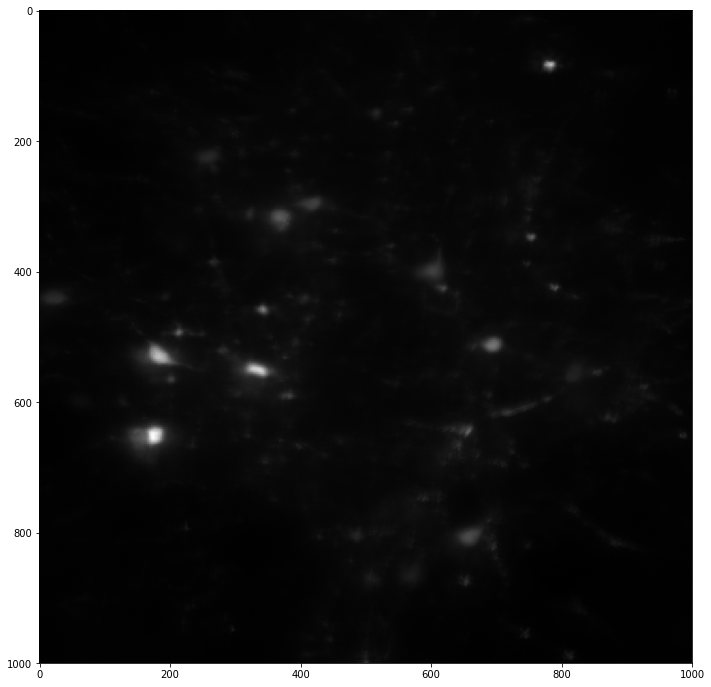

In [5]:
plt.figure(figsize=(12, 12))
plt.imshow(z_slice, cmap=plt.cm.gray)

In [6]:
gaussian_filter = gaussian(z_slice)

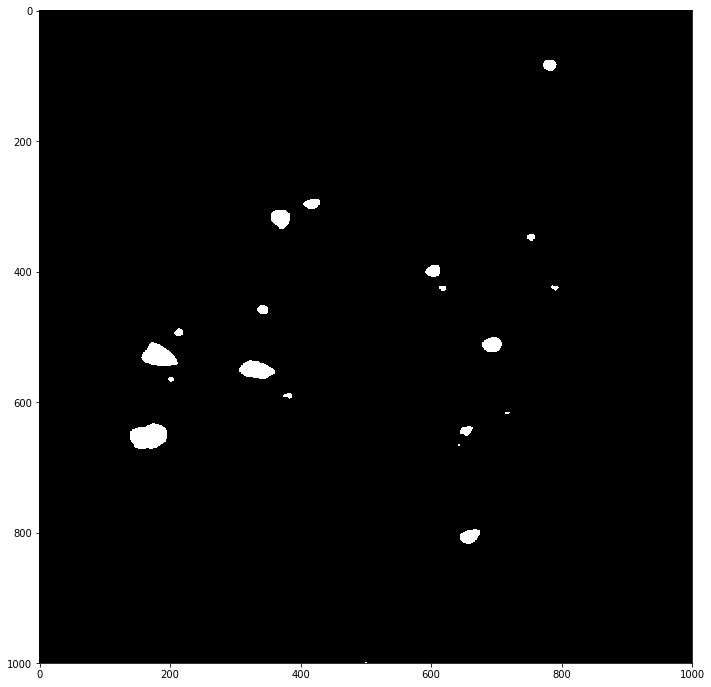

In [7]:
otsu_thresh_value = threshold_otsu(gaussian_filter)
otsu_thresh_immediate = gaussian_filter > otsu_thresh_value

plt.figure(figsize=(12, 12))
plt.imshow(otsu_thresh_immediate, cmap=plt.cm.gray)

In [8]:
# Thresholding: making all voxels with intensity less than half of otsu's 0.
thresh_value = threshold_otsu(z_slice) / 2
# z_slice = z_slice > thresh_value

initial_thresholding = np.zeros(z_slice.shape)

for i in range(0, x_dim):
    for j in range(0, y_dim):
        initial_thresholding[j, i] = 0 if z_slice[j, i] < thresh_value else z_slice[j, i]

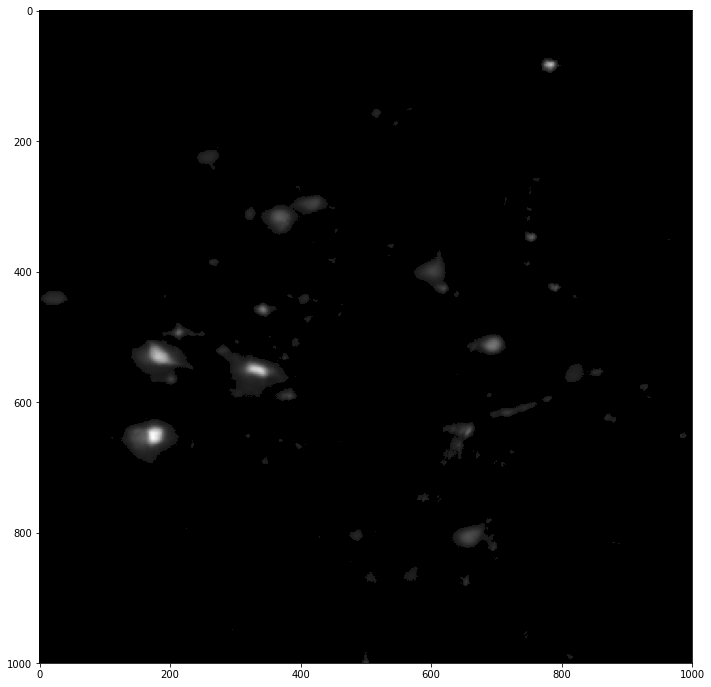

In [9]:
plt.figure(figsize=(12, 12))
plt.imshow(initial_thresholding, cmap=plt.cm.gray)

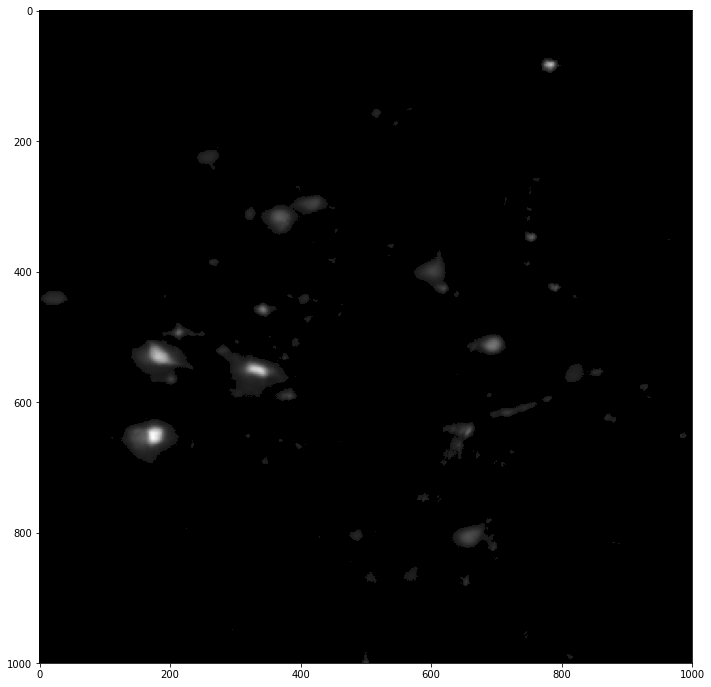

In [10]:
otsu_thresh_value = threshold_otsu(initial_thresholding)
otsu_thresh_after_init = initial_thresholding > otsu_thresh_value

plt.figure(figsize=(12, 12))
plt.imshow(initial_thresholding, cmap=plt.cm.gray)

In [11]:
# Adaptive thresholding.
block_size = 35
local_thresh = threshold_local(z_slice, block_size)

# plt.figure(figsize=(10, 10))
# plt.imshow(local_thresh, cmap=plt.cm.gray)

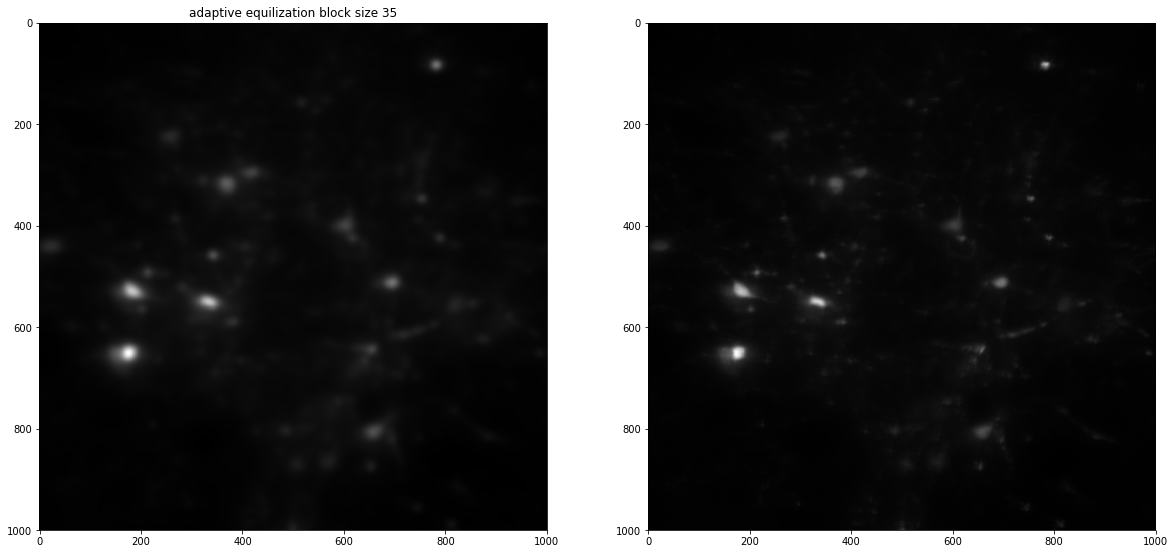

In [12]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization block size 35')
plt.imshow(local_thresh, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

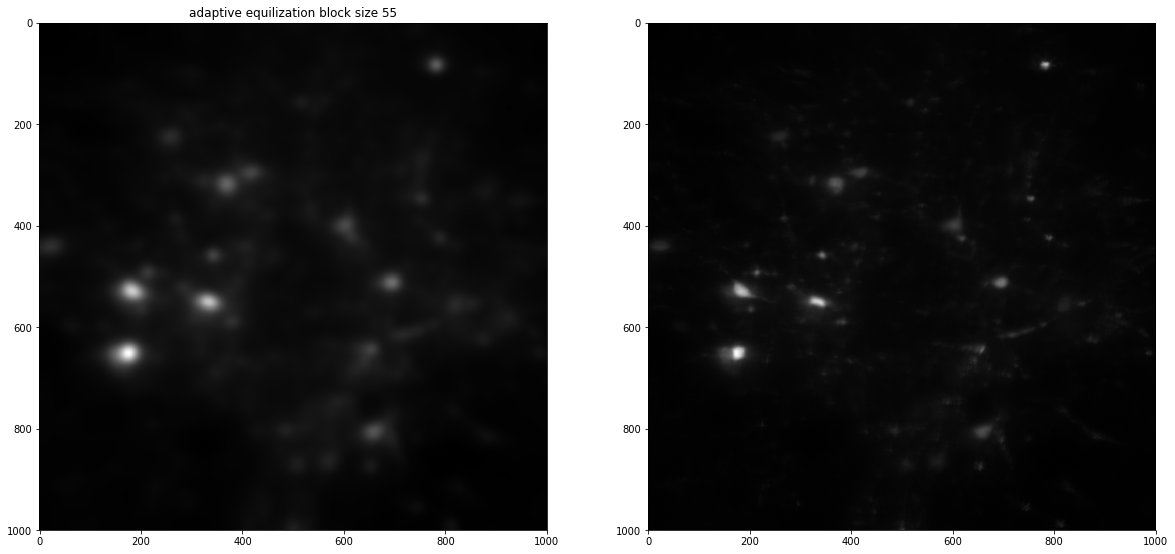

In [13]:
block_size = 55
local_thresh_55 = threshold_local(z_slice, block_size)

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization block size 55')
plt.imshow(local_thresh_55, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

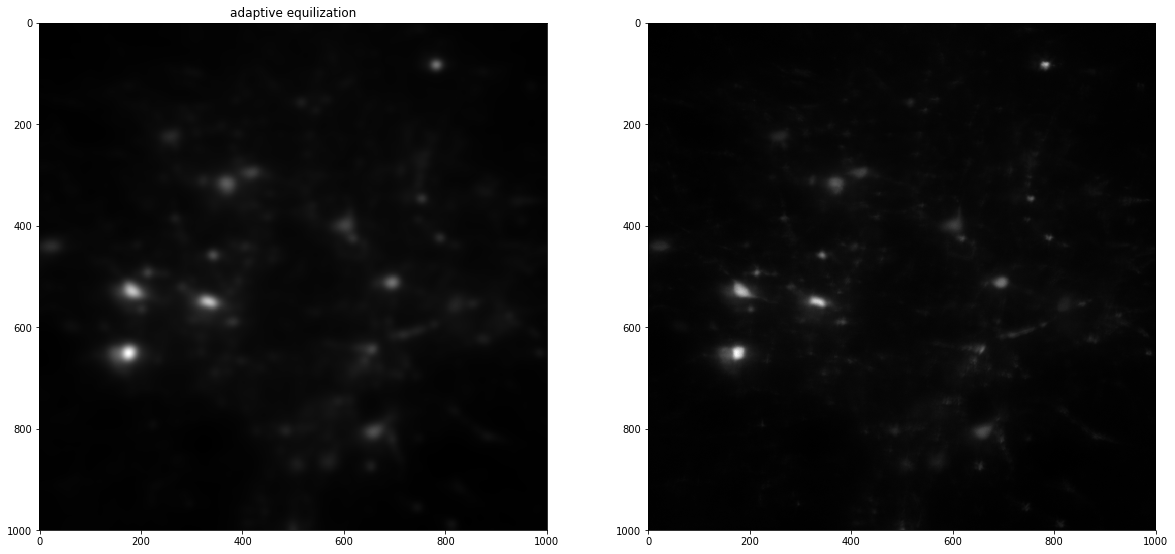

In [14]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization')
plt.imshow(local_thresh, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

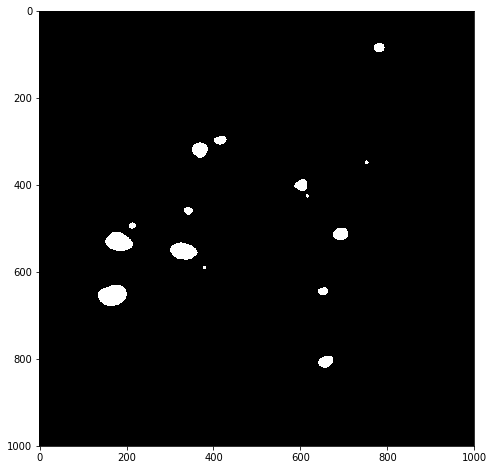

In [15]:
otsu_thresh_value = threshold_otsu(local_thresh)
otsu_local = local_thresh > otsu_thresh_value

plt.figure(figsize=(8, 8))
plt.imshow(otsu_local, cmap=plt.cm.gray)

In [18]:
# Thresholding: making all voxels with intensity less than half of otsu's 0.
otsus = []

for k in range(0, z_dim):
    s = img_stack[k,:,:]
    otsus.append(threshold_otsu(s))

In [19]:
stack_otsu_thresh = np.median(otsus)
print(np.median(otsus))

23.7731639105


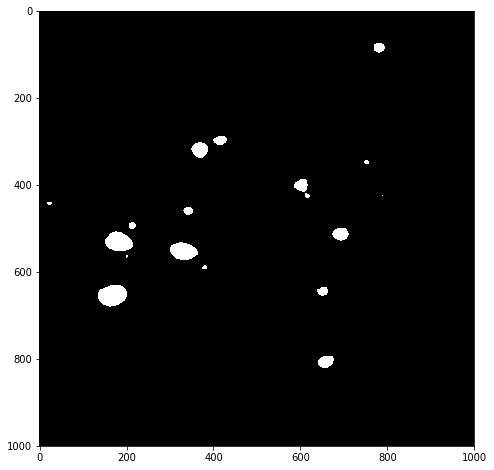

In [20]:
otsu_thresh_value = threshold_otsu(local_thresh)
stack_otsu_local = local_thresh > stack_otsu_thresh

plt.figure(figsize=(8, 8))
plt.imshow(stack_otsu_local, cmap=plt.cm.gray)

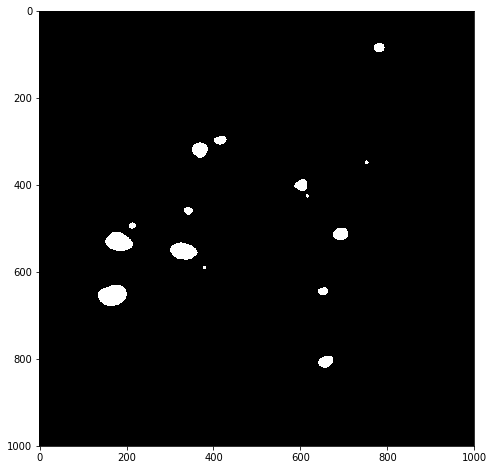

In [21]:
# morphological erosion
local_otsu_erosion = erosion(otsu_local, disk(5))

plt.figure(figsize=(8, 8))
plt.imshow(otsu_local, cmap=plt.cm.gray)

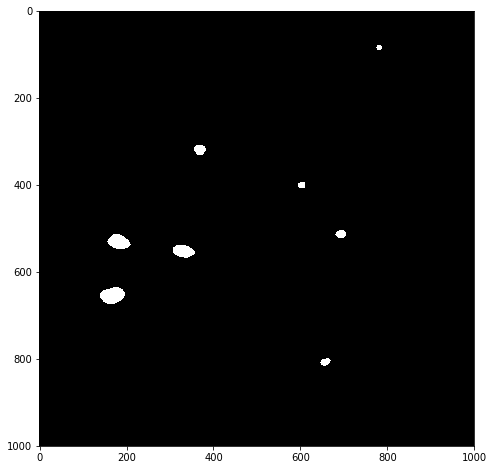

In [22]:
# Morphological Opening
local_otsu_erosion_opening = opening(local_otsu_erosion, disk(5))

plt.figure(figsize=(8, 8))
plt.imshow(local_otsu_erosion_opening, cmap=plt.cm.gray)

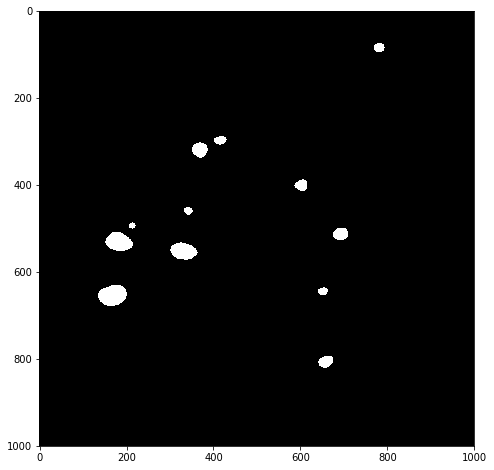

In [23]:
# Morphological Opening without extra erosion
local_otsu_opening = opening(otsu_local, disk(5))

plt.figure(figsize=(8, 8))
plt.imshow(local_otsu_opening, cmap=plt.cm.gray)

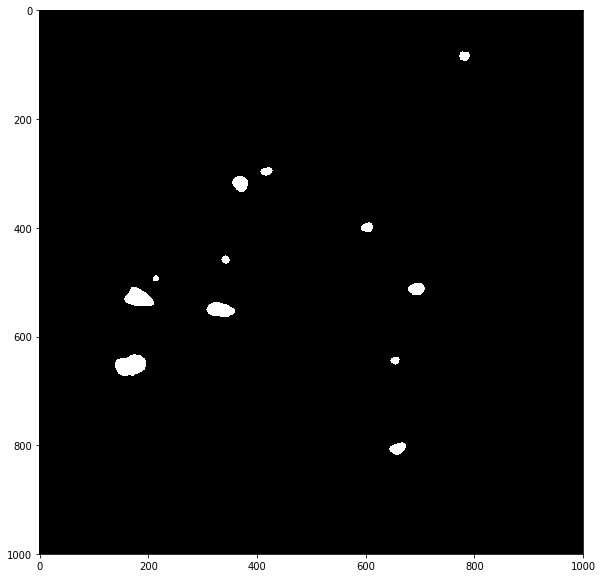

In [24]:
otsu_opening = binary_opening(otsu_thresh_immediate, disk(5))

plt.figure(figsize=(10, 10))
plt.imshow(otsu_opening, cmap=plt.cm.gray)

# Distance Transform

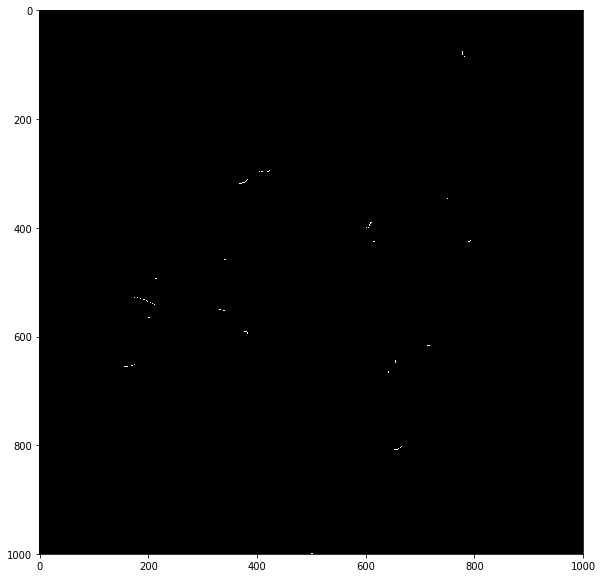

In [25]:
medial_axis_img = medial_axis(otsu_thresh_immediate)

plt.figure(figsize=(10, 10))
plt.imshow(medial_axis_img, cmap=plt.cm.gray)

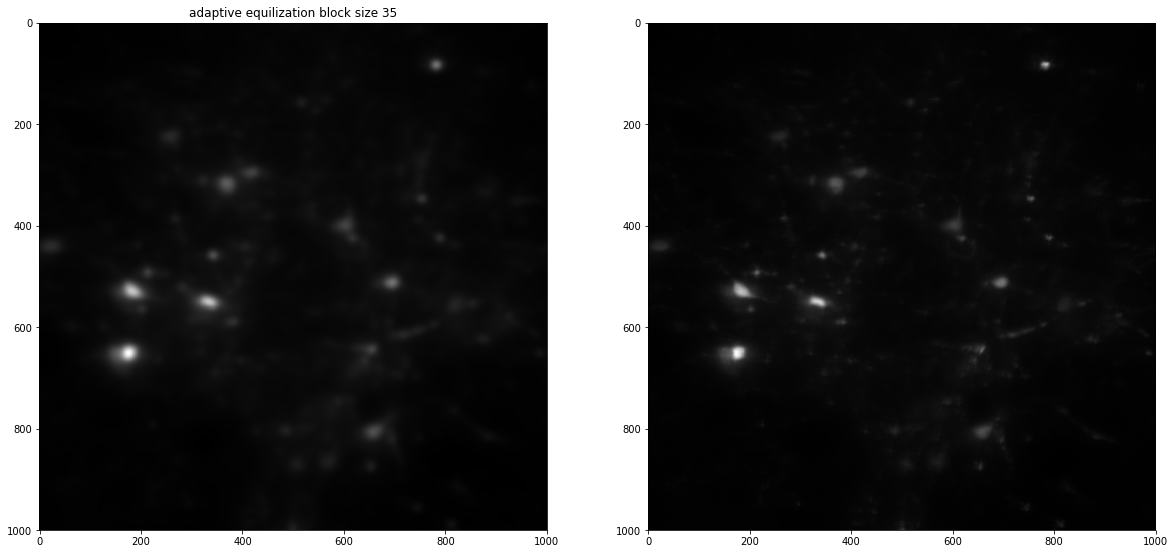

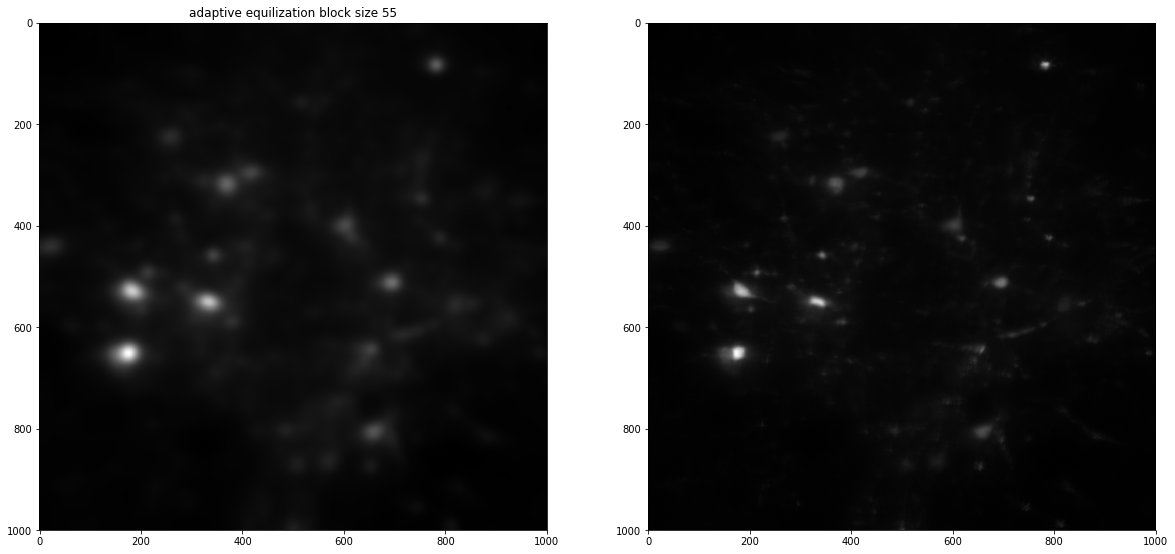

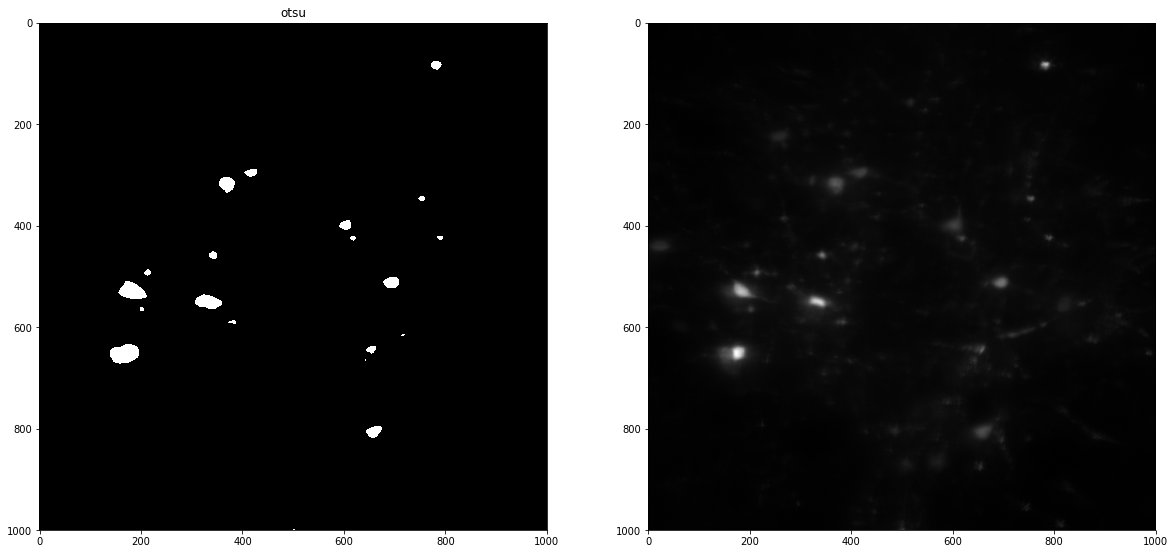

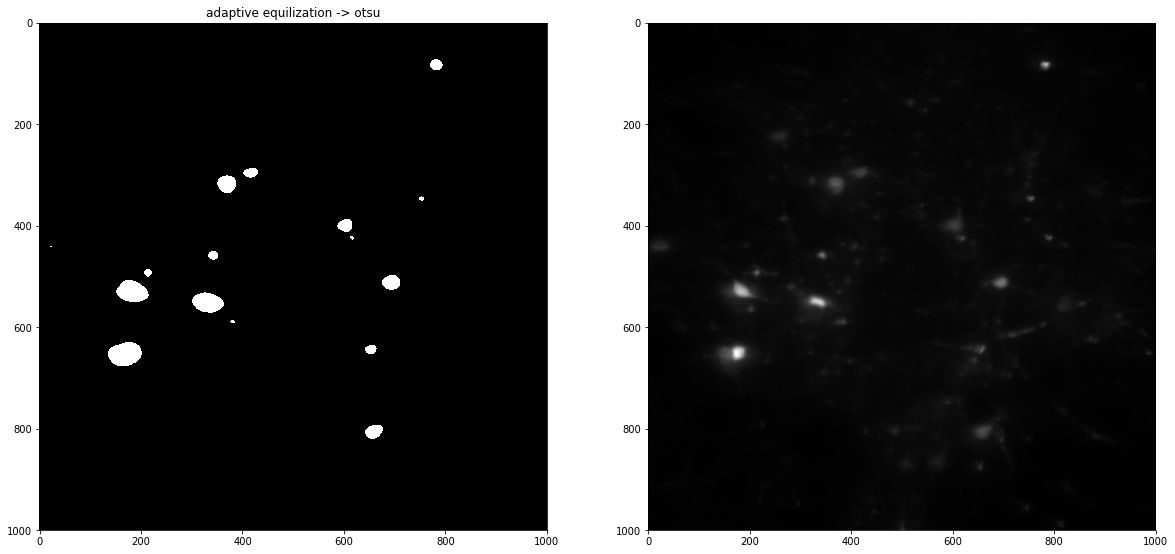

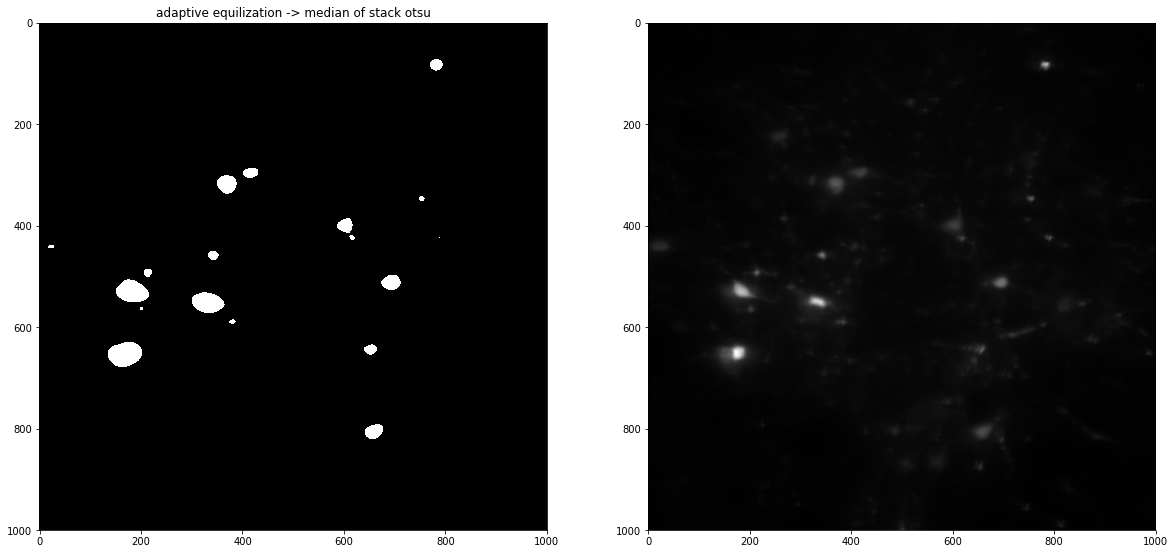

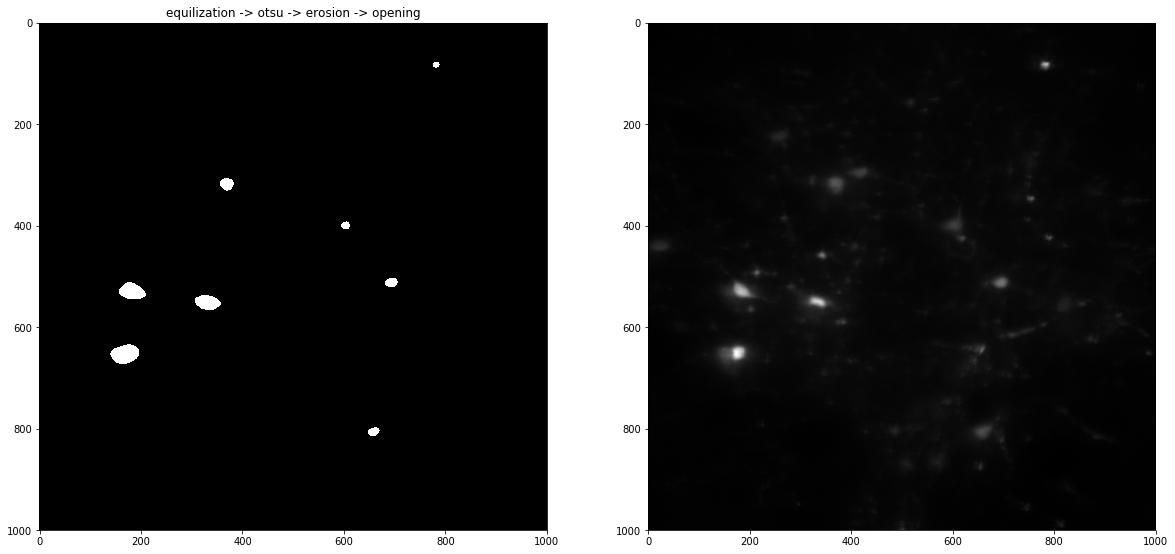

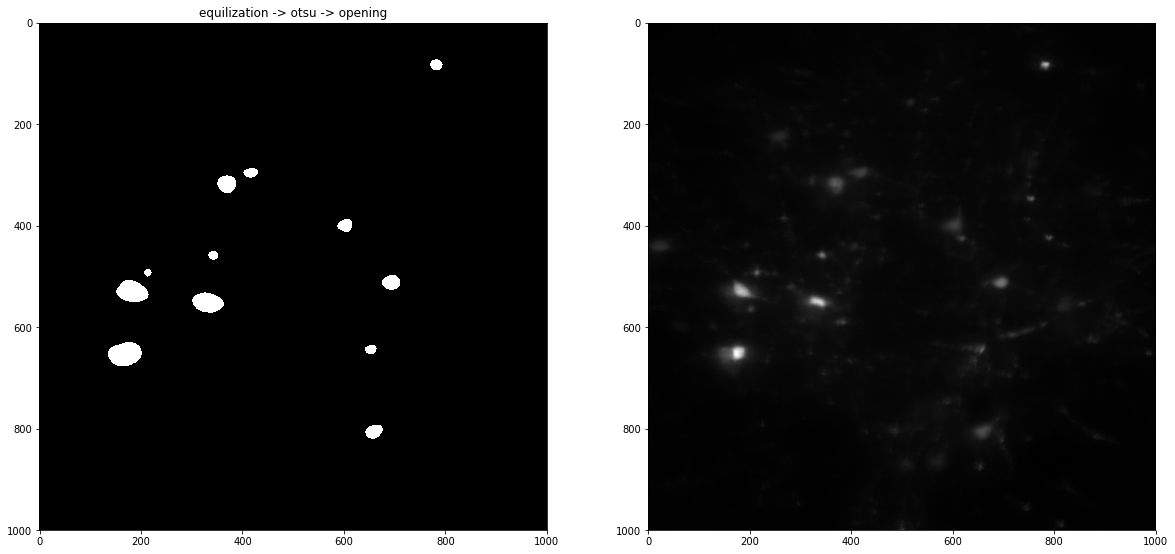

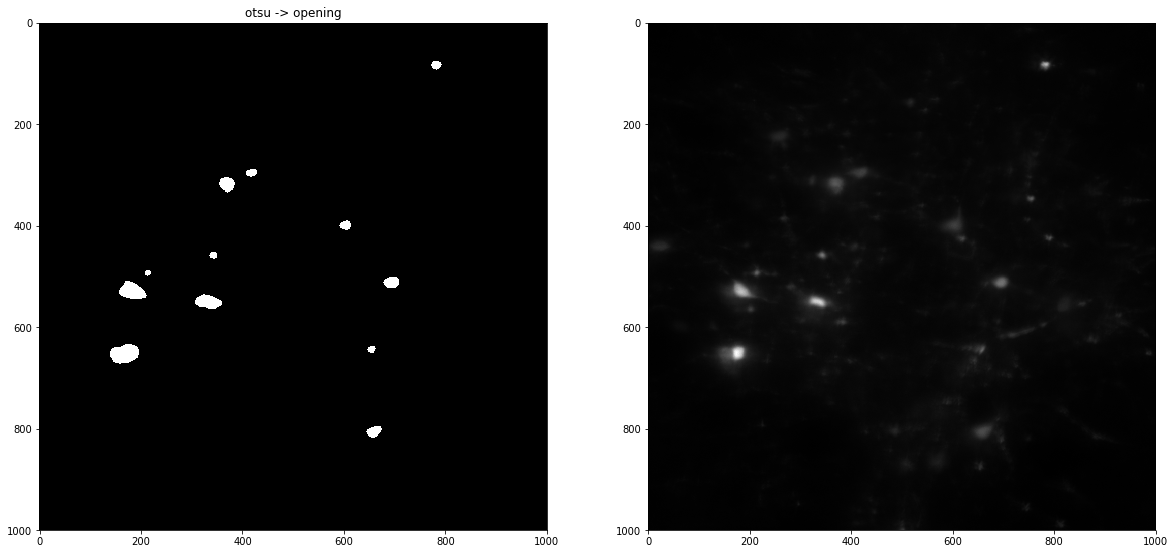

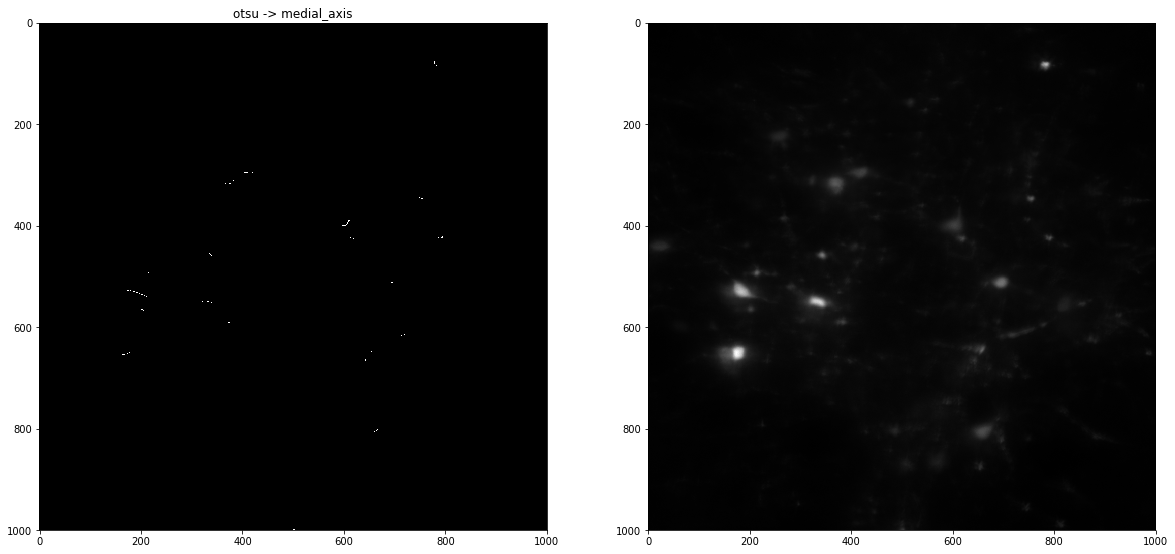

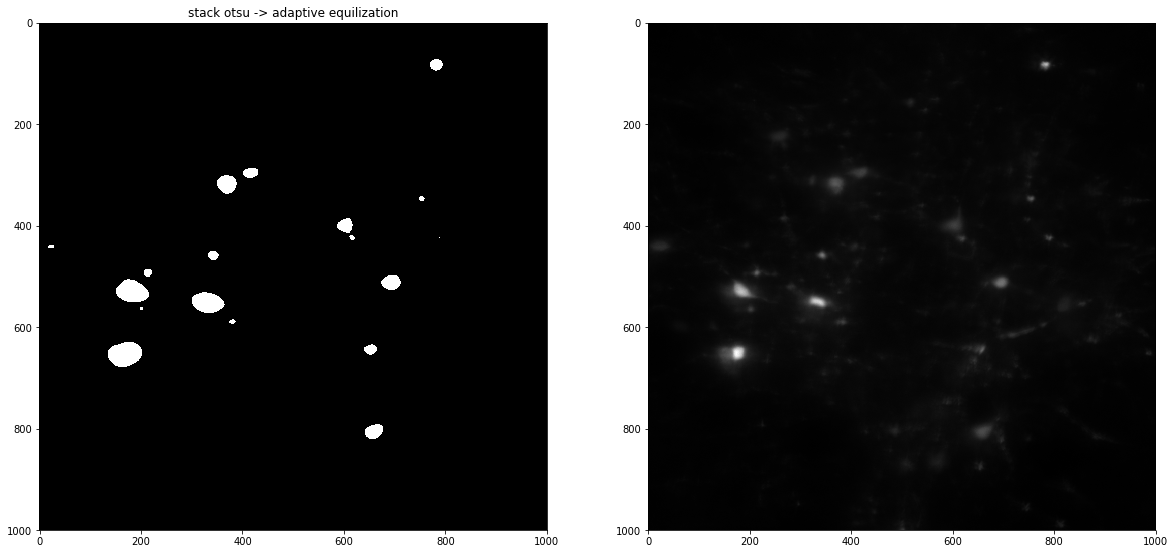

In [26]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization block size 35')
plt.imshow(local_thresh, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# =========================

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization block size 55')
plt.imshow(local_thresh_55, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# ================

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('otsu')
plt.imshow(otsu_thresh_immediate, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)


plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization -> otsu')
plt.imshow(otsu_local, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)


plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('adaptive equilization -> median of stack otsu')
plt.imshow(stack_otsu_local, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)


plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('equilization -> otsu -> erosion -> opening')
plt.imshow(local_otsu_erosion_opening, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)



plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('equilization -> otsu -> opening')
plt.imshow(local_otsu_opening, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# ============

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('otsu -> opening')
plt.imshow(otsu_opening, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# ============

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('otsu -> medial_axis')
plt.imshow(medial_axis_img, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# ============

plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.title('stack otsu -> adaptive equilization')
plt.imshow(stack_otsu_local, cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

# Clustering

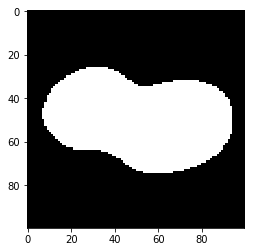

In [69]:
roi = otsu_local[720:820,500:600]

plt.imshow(roi, cmap=plt.cm.gray)

In [70]:
kmeans_img = slic(roi, n_segments=2)

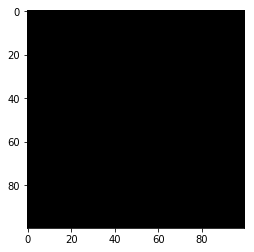

In [74]:

plt.imshow(kmeans_img, cmap=plt.cm.gray)

In [75]:
not np.any(z_slice)

False

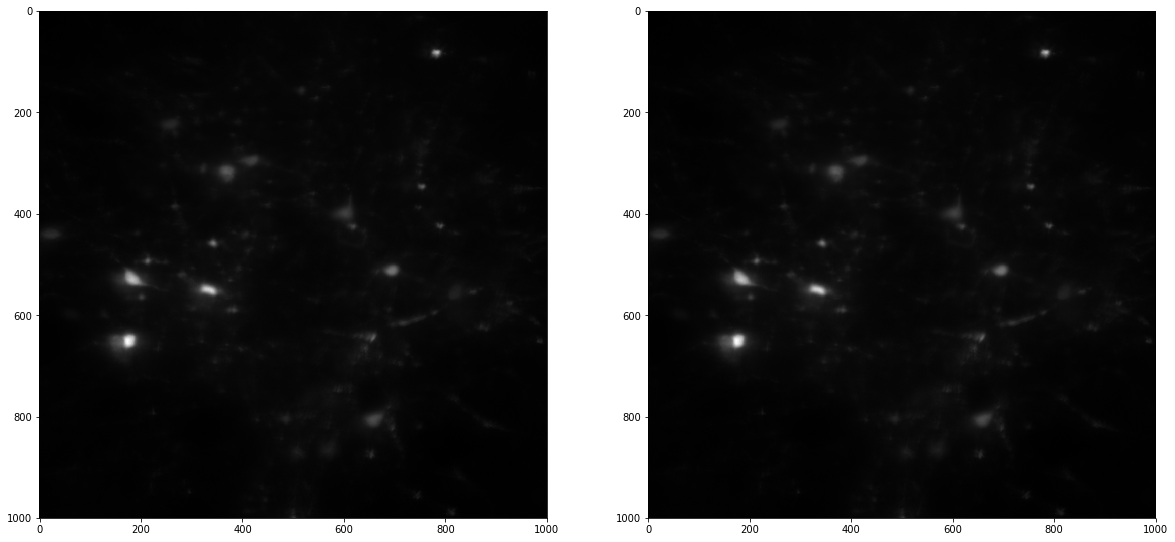

In [48]:
plt.figure(figsize=(20, 20))

s = img_stack[60,:,:]

plt.subplot(1,2,1)
plt.imshow(s, cmap=plt.cm.gray)


s = img_stack[61,:,:]

plt.subplot(1,2,2)
plt.imshow(z_slice, cmap=plt.cm.gray)

